<a href="https://colab.research.google.com/github/bbiyongel/google_colab/blob/master/t_academy_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_csv('http://wolfpack.hnu.ac.kr/Big_Data/data/MLB1871_2018/Salaries.csv')

In [4]:
df.shape

(26428, 5)

In [3]:
df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [6]:
df.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


In [0]:
df.var = df.var.replace('',np.nan)(check)
df.isnull().sum()

In [10]:
df.dropna(inplace=True)
df.shape

(26428, 5)

In [8]:
df.isnull().sum()

yearID      0
teamID      0
lgID        0
playerID    0
salary      0
dtype: int64

In [9]:
df.isna().sum()

yearID      0
teamID      0
lgID        0
playerID    0
salary      0
dtype: int64

In [20]:
df16 = df[(df['yearID']==2016) & (df['salary']>0)]
df16.head(3)

,yearID,teamID,lgID,playerID,salary
25575,2016,ARI,NL,ahmedni01,521600
25576,2016,ARI,NL,barreja01,507500
25577,2016,ARI,NL,brachsi01,509300


In [21]:
import plotly.express as px
fig = px.scatter(df16, x="salary", y='playerID', color='lgID', title="player salary with lgID")
fig.show()

In [0]:
# pca ,svd 차원축소는 상관구조로 하는게 아니고 공분산 구조로 함(요인분석 기반) 아이겐벨류,아이겐벡터

In [0]:
df.set)index('변수명',inplace=True)

In [22]:
df_sample = df16['salary'].sample(n=50, random_state=123) # seed = 109
df_sample.shape

(50,)

In [23]:
type(df_sample)

pandas.core.series.Series

Text(0.5, 1.0, '2016 salary')

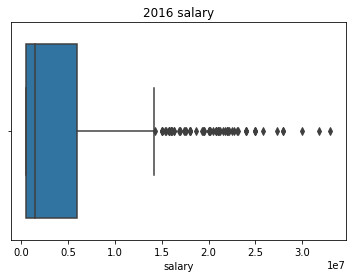

In [24]:
import seaborn as sns
sns.boxplot(df16.salary).set_title('2016 salary : total')

Text(0.5, 1.0, '2016 salary : sample')

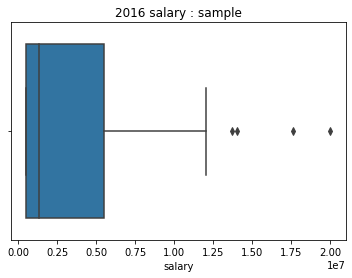

In [26]:
import seaborn as sns
sns.boxplot(df_sample).set_title('2016 salary : sample')

In [28]:
# 정규성 검정

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


In [29]:
from scipy import stats
stats.anderson(df16.salary, dist='norm')

AndersonResult(statistic=89.66166203890168, critical_values=array([0.573, 0.653, 0.783, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [32]:
import numpy as np
from scipy import stats
stats.anderson(np.log(df16.salary), dist='norm')

AndersonResult(statistic=43.946751127023845, critical_values=array([0.573, 0.653, 0.783, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [0]:
# data split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df.salary, test_size=0.3)

In [0]:
bat = pd.read_csv('http://wolfpack.hnu.ac.kr/Big_Data/data/MLB1871_2018/Batting.csv')

In [0]:
df_bat = bat[bat.yearID==2016]
df_sal = df[df.yearID==2016]

In [39]:
df_bat_sal = pd.merge(df_bat, df_sal, on='playerID')
df_bat_sal.head(3)

,playerID,yearID_x,stint,teamID_x,lgID_x,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,yearID_y,teamID_y,lgID_y,salary
0,abadfe01,2016,1,MIN,AL,39,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,2016,MIN,AL,1250000
1,abadfe01,2016,2,BOS,AL,18,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2016,MIN,AL,1250000
2,abreujo02,2016,1,CHA,AL,159,624,67,183,32,1,25,100.0,0.0,2.0,47,125.0,7.0,15.0,0.0,9.0,21.0,2016,CHA,AL,11666667


In [0]:
df_bat_sal.set_index('playerID', inplace=True)

In [0]:
from sklearn.model_selection import train_test_split
x, y = df_bat_sal.iloc[:,4:21], df_bat_sal.salary
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, random_state=123)

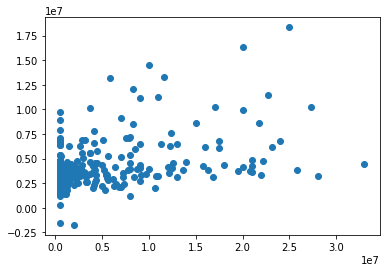

In [43]:
from sklearn.linear_model import LinearRegression as lm
model = lm().fit(x_train,y_train)
predictions = model.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

In [44]:
model.coef_

array([ -32537.4138351 ,    5707.72047477,    3764.96668509,
         54305.85730844, -225235.53186537, -533998.00382186,
          3445.58344022,   50092.64587586,   36283.79004909,
       -419255.01433906,   80831.72509313,  -42904.02506454,
        165005.15359771, -100820.17044647,  203120.14493859,
          -998.82570547,  132892.97323581])

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# google drive path
/content/sample_data/california_housing_test.csv

In [46]:
!pip install -U finance-datareader

In [0]:
import FinanceDataReader as fdr
df_krx = fdr.StockListing('KRX')

In [50]:
name = input('주식 코드 기업명 ?')
df_krx[df_krx['Name'].str.contains(name)]

주식 코드 기업명 ?삼성


,Symbol,Name,Sector,Industry
34,006400,삼성SDI,일차전지 및 축전지 제조업,"칼라브라운관,PDP,평판표시관,모니터,휴대용 디스플레이,폴리머전지(2차전지),초박형..."
35,207940,삼성바이오로직스,기초 의약물질 및 생물학적 제제 제조업,바이오의약품
36,068290,삼성출판사,"서적, 잡지 및 기타 인쇄물 출판업","서적 출판,인쇄,소매/부동산 임대"
37,029780,삼성카드,기타 금융업,"신용카드업,상품신용판매,현금서비스,카드론,리스,기업대출,여행업무,통신판매"
38,000810,삼성화재해상보험,보험업,"손해보험의 원수,재보험,운용자산의 투자활동"
633,018260,삼성에스디에스,"컴퓨터 프로그래밍, 시스템 통합 및 관리업","IT서비스, 물류BPO"
634,010140,삼성중공업,선박 및 보트 건조업,"선박(벌크선,원유운반선),철구조물,에너지플랜트 생산,판매/토목건축업"
635,016360,삼성증권,금융 지원 서비스업,"유가증권의 매매,위탁매매,인수주선"
942,028260,삼성물산,기타 전문 도매업,"도소매, 건설, 남자용 정장 제조업 등"
943,005930,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반..."


In [0]:
삼성전자 = fdr.DataReader('005930','2015-01-01','2019-12-31')
현대차 = fdr.DataReader('005380','2015-01-01','2019-12-31')
셀트리온 = fdr.DataReader('068270','2015-01-01','2019-12-31')
한전 = fdr.DataReader('015760','2015-01-01','2019-12-31')
sk텔레컴 = fdr.DataReader('017670','2015-01-01','2019-12-31')

In [55]:
df_comp = pd.concat([삼성전자['Change'],현대차['Change'],셀트리온['Change'],한전['Change'],sk텔레컴['Change']],axis=1)
df_comp.columns = ['삼성전자','현대차','셀트리온','한전','sk텔레컴']
df_comp.head(3)

,삼성전자,현대차,셀트리온,한전,sk텔레컴
Date,,,,,
2015-01-02,0.002261,0.000000,0.007714,0.000000,0.016791
2015-01-05,0.002256,-0.005917,-0.005122,-0.016393,0.014679
2015-01-06,-0.028507,-0.020833,-0.017963,-0.003571,-0.007233


In [57]:
import datetime
df_comp['요일'] = df_comp.index.weekday
df_comp['분기'] = df_comp.index.quarter
df_comp['주'] = df_comp.index.week
df_comp['연도'] = df_comp.index.year
df_comp['월'] = df_comp.index.month
df_comp.head()

# 요일 0:월요일 , 4:금요일

,삼성전자,현대차,셀트리온,한전,sk텔레컴,요일,분기,주,연도,월
Date,,,,,,,,,,
2015-01-02,0.002261,0.000000,0.007714,0.000000,0.016791,4,1,1,2015,1
2015-01-05,0.002256,-0.005917,-0.005122,-0.016393,0.014679,0,1,2,2015,1
2015-01-06,-0.028507,-0.020833,-0.017963,-0.003571,-0.007233,1,1,2,2015,1
2015-01-07,0.009266,0.033435,-0.009160,0.031063,-0.018215,2,1,2,2015,1
2015-01-08,0.005356,0.047059,0.005291,-0.031286,-0.016698,3,1,2,2015,1


In [60]:
df_rev = df_comp.groupby(['연도','월']).mean().iloc[:,0:5]
df_rev.head()

삼성전자       현대차      셀트리온        한전     sk텔레컴
연도   월                                                  
2015 1  0.001425  0.000295  0.002323  0.000783  0.003682
     2 -0.000302 -0.003080  0.030308  0.002169 -0.000403
     3  0.002907  0.002414  0.003999  0.001438 -0.002115
     4 -0.000884  0.000282  0.010120  0.001022  0.002530
     5 -0.004113 -0.003661 -0.011744 -0.000604 -0.008231

In [63]:
# 기대 월수익

rev_array = np.array(df_rev)
one = np.array(np.repeat(1,rev_array.shape[0]))
exp = one.T@rev_array/rev_array.shape[0]
exp

array([ 7.08163380e-04, -1.05281018e-04,  1.87487181e-03, -2.32032581e-04,
        2.09784006e-05])

In [0]:
# 2개 포트폴리오 구성 

w = np.array([[0.2, 0.2, 0.2, 0.2, 0.2],
             [0.3, 0.1, 0.2, 0.1, 0.3],
             [0.3, 0.2, 0.2, 0.1, 0.2]])

In [67]:
w@exp

array([0.00045334, 0.00055999, 0.00054736])

In [0]:
# 공분산 Cov(X,Y) = E[(x-mu_x)*(y-mu_y)]
exp_repeat = np.tile(exp,(rev_array.shape[0],1))
A = rev_array.T - exp_repeat.T
B = rev_array - exp_repeat
(A @ B)
cov = (A@B)/rev_array.shape[0]

In [70]:
w@cov@w.T

array([[5.03388254e-06, 4.94928132e-06, 5.12723023e-06],
       [4.94928132e-06, 5.16367699e-06, 5.20362988e-06],
       [5.12723023e-06, 5.20362988e-06, 5.39634487e-06]])

In [76]:
# 과업 최소분산(위험) 포트폴리오 구성

import numpy.linalg as lin
np.array([1,1,1,1,1]).T@lin.inv(cov)
np.array([1,1,1,1,1]).T@lin.inv(cov)@np.array([1,1,1,1,1])
w = np.array((np.array([1,1,1,1,1]).T@lin.inv(cov))/(np.array([1,1,1,1,1]).T@lin.inv(cov)@np.array([1,1,1,1,1])))
print('가중치=',w, '기대수익률=',w.T@exp, '위험=',w.T@cov@w)


가중치= [0.2419881  0.08692076 0.04555151 0.27298861 0.35255103] 기대수익률= 0.0001916729538989213 위험= 3.519514620445002e-06


In [0]:
# 수비 위치에 따른 선수 연봉 차이



In [0]:
# 상관관계 : 
# 열의 유사성 => 상관계수로 판단, 
# 행의 유사성 판단 => 군집변수, 판별변수 (경기능력의 거리 => 유클리디안 : 직선의 거리 )
# 그래서 판단하려면 숫자라야함 0,1로 넣으면 판단 못함 (0,1은 순서형 변수만 가능)

In [84]:
df_bat_sal.columns

Index(['yearID_x', 'stint', 'teamID_x', 'lgID_x', 'G', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF',
       'GIDP', 'yearID_y', 'teamID_y', 'lgID_y', 'salary'],
      dtype='object')

In [85]:
df_bat_sal.head()

,yearID_x,stint,teamID_x,lgID_x,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,yearID_y,teamID_y,lgID_y,salary
playerID,,,,,,,,,,,,,,,,,,,,,,,,,
zychto01,2016,1,SEA,AL,12,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2016,SEA,AL,511000
zobribe01,2016,1,CHN,NL,147,523,94,142,31,3,18,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0,2016,CHN,NL,10500000
zimmery01,2016,1,WAS,NL,115,427,60,93,18,1,15,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0,2016,WAS,NL,14000000
zimmejo02,2016,1,DET,AL,19,4,0,1,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,2016,DET,AL,18000000
zieglbr01,2016,2,BOS,AL,33,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2016,ARI,NL,5500000


In [0]:
df_bat_sal.reset_index(inplace=True)

Karl peason : 거리로 따짐

spearman : coor 순위 (이상치가 있으면 안좋다)


In [87]:
# 중복제거 : stint = 2이상 (시즌중 팀을 옮긴 선수)

df_bat_sal.sort_values(['playerID','stint'], ascending=False, inplace=True)
df_bat_sal['move'] = df_bat_sal['playerID'].duplicated()
df0 = df_bat_sal[df_bat_sal['move']==False&(df_bat_sal.stint==1)]
df0.shape



(812, 27)

In [88]:
df0.head()

,playerID,yearID_x,stint,teamID_x,lgID_x,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,yearID_y,teamID_y,lgID_y,salary,move
0,zychto01,2016,1,SEA,AL,12,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2016,SEA,AL,511000,False
1,zobribe01,2016,1,CHN,NL,147,523,94,142,31,3,18,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0,2016,CHN,NL,10500000,False
2,zimmery01,2016,1,WAS,NL,115,427,60,93,18,1,15,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0,2016,WAS,NL,14000000,False
3,zimmejo02,2016,1,DET,AL,19,4,0,1,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,2016,DET,AL,18000000,False
4,zieglbr01,2016,2,BOS,AL,33,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2016,ARI,NL,5500000,False


In [95]:
df0.columns

Index(['playerID', 'teamID_x', 'lgID_x', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
       'salary'],
      dtype='object')

In [0]:
# df0.drop(columns=['yearID_x','yearID_y','teamID_y','lgID_x','stint','move'], axis=1, inplace=True)
# KeyError: "['stint' 'move'] not found in axis"
df0.set_index('playerID', inplace=True)

In [98]:
df_cor = df0.corr()
df_cor.style.background_gradient(cmap='coolwarm').set_precision(3)

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
G,1,0.925,0.902,0.913,0.884,0.606,0.806,0.88,0.508,0.578,0.848,0.869,0.581,0.688,0.0928,0.744,0.822,0.15
AB,0.925,1,0.974,0.99,0.959,0.65,0.868,0.951,0.552,0.627,0.897,0.93,0.614,0.725,0.131,0.802,0.886,0.214
R,0.902,0.974,1,0.978,0.947,0.671,0.892,0.95,0.589,0.655,0.92,0.909,0.631,0.732,0.0952,0.791,0.841,0.216
H,0.913,0.99,0.978,1,0.969,0.665,0.858,0.951,0.566,0.64,0.886,0.893,0.632,0.72,0.115,0.802,0.881,0.219
2B,0.884,0.959,0.947,0.969,1,0.634,0.836,0.934,0.525,0.606,0.861,0.87,0.616,0.699,0.086,0.781,0.852,0.191
3B,0.606,0.65,0.671,0.665,0.634,1,0.457,0.564,0.574,0.611,0.597,0.566,0.419,0.498,0.23,0.514,0.461,0.0154
HR,0.806,0.868,0.892,0.858,0.836,0.457,1,0.946,0.355,0.426,0.845,0.883,0.633,0.657,-0.0587,0.725,0.775,0.247
RBI,0.88,0.951,0.95,0.951,0.934,0.564,0.946,1,0.444,0.513,0.893,0.9,0.676,0.698,0.0164,0.822,0.871,0.255
SB,0.508,0.552,0.589,0.566,0.525,0.574,0.355,0.444,1,0.817,0.496,0.5,0.308,0.409,0.259,0.411,0.382,0.0142
CS,0.578,0.627,0.655,0.64,0.606,0.611,0.426,0.513,0.817,1,0.564,0.569,0.32,0.469,0.24,0.424,0.446,-0.0026


In [107]:
cor_target = abs(df_cor['salary'])
relevant_features = cor_target[cor_target>0.22].index.values.tolist()
df_fin = df0[relevant_features]
df_fin.head()

,HR,RBI,BB,IBB,SF,GIDP,salary
playerID,,,,,,,
zychto01,0,0.0,0,0.0,0.0,0.0,511000
zobribe01,18,76.0,96,6.0,4.0,17.0,10500000
zimmery01,15,46.0,29,1.0,6.0,12.0,14000000
zimmejo02,0,0.0,0,0.0,0.0,0.0,18000000
zieglbr01,0,0.0,0,0.0,0.0,0.0,5500000


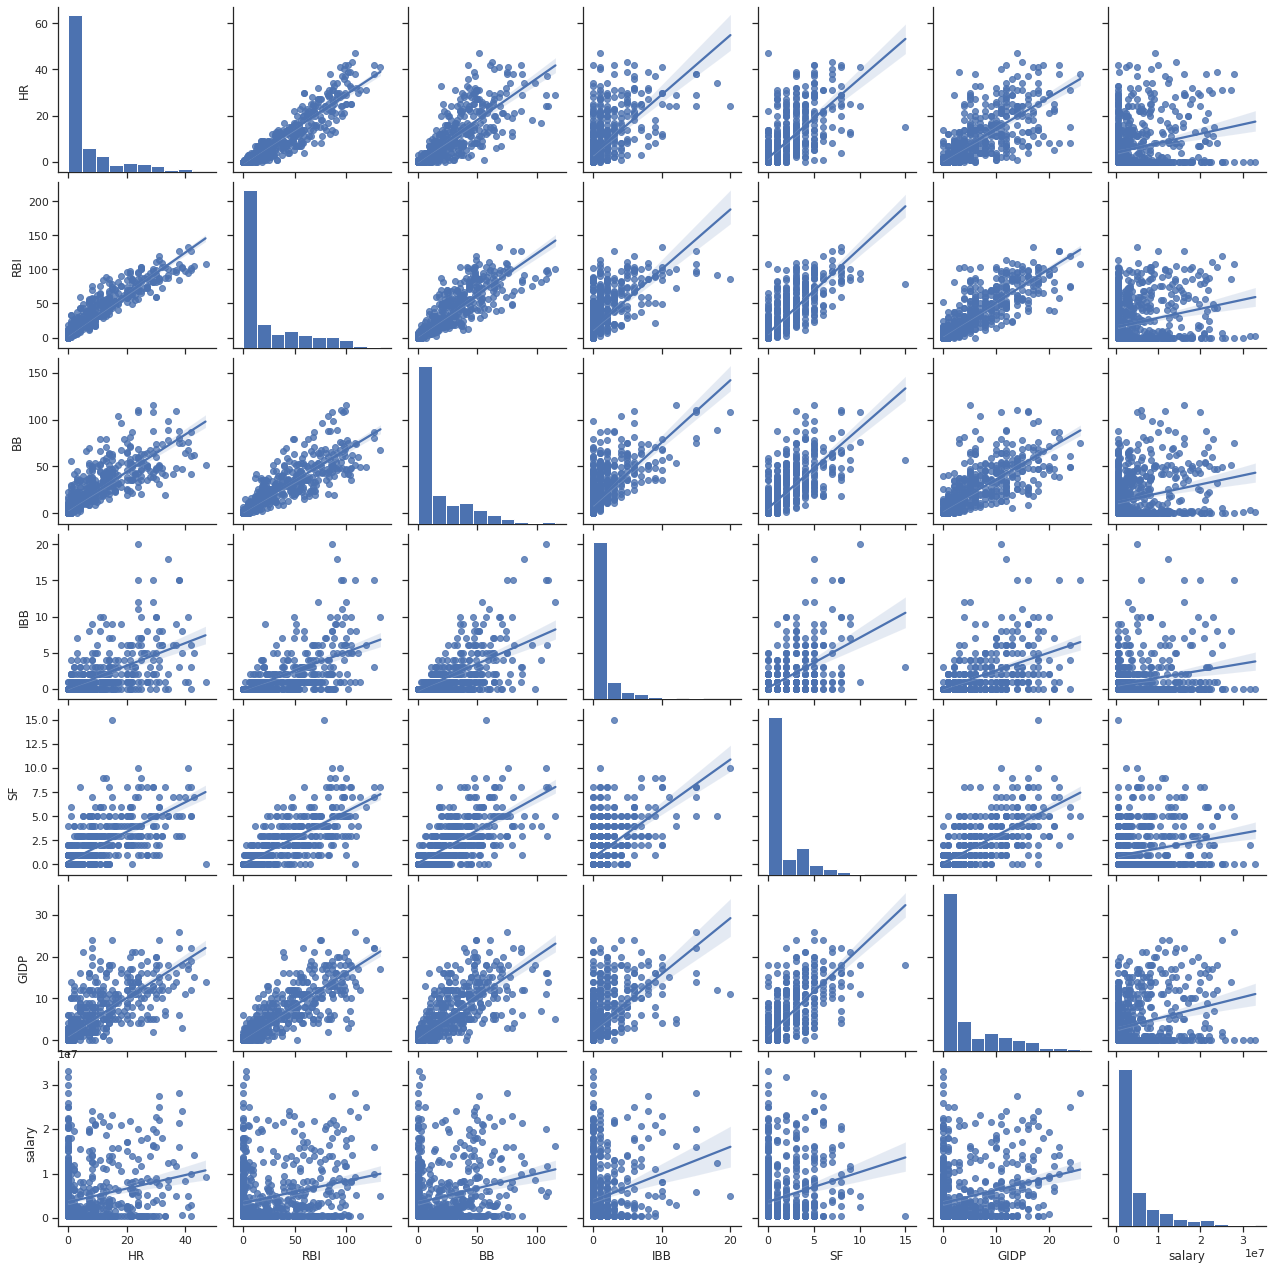

In [108]:
sns.set(style="ticks")
sns.pairplot(df_fin, kind='reg')

In [0]:
# 다중공선성 해결 : 차원축소(pca,svd) 보다는 centering 

In [120]:
df1.head()

,teamID_x,lgID_x,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
playerID,,,,,,,,,,,,,,,,,,,,
zychto01,SEA,AL,12,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,511000
zobribe01,CHN,NL,147,523,94,142,31,3,18,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0,10500000
zimmery01,WAS,NL,115,427,60,93,18,1,15,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0,14000000
zimmejo02,DET,AL,19,4,0,1,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,18000000
zieglbr01,BOS,AL,33,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,5500000


In [0]:
df1 = df0[['G',	'AB',	'R']].copy()
df1.reset_index( inplace=True)

In [130]:
# pca
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(df1) # with_std=False, with_mean=False 옵션 지우면 표준화됨, 공분산 : 둘다 False, 상관 : std만 False
from sklearn.decomposition import PCA
pca= PCA(0.8) # PCA(0.8) rule 80%확률 , n_components=2
df_pca=pca.fit_transform(X)
pd.DataFrame(df_pca)


ValueError: ignored

In [0]:
pd.DataFrame(df_pca).corr()


In [0]:
plt.plot(df_pca)
plt.title('pca')
plt.show()

In [0]:
# 변수영향도 : 이름붙이기 힘들지만 많이 영향도 있는 변수들을 보고 판단 
df_loading = pd.DataFrame(pca.components_.T)
df_loading.set_index(df1.columns)

In [0]:
# id별 주성분 수치
pca_df = pd.DataFrame(df_pca.columns=['주성분1','주성분2'])
pca_df.set_index(df1.index, inplace=True)
pca_df.reset_index(inplace=True)
pca_df.head()

In [0]:
# 2차원 시각화 
fig = px.scatter(pca_df, x='주성분1', y='주성분2', text='playerID')
fig.show()

In [0]:
# 주성분 분석으로 변수 차원 축소해놓고 그걸로 회귀분석진행

In [0]:
# SVD : singular value decomposition 
# pca는 공분산 이용, svd는 직교행렬로 분해(변수 영향도 파악 어려움)


In [0]:
# 판별분석 : 다변량 분석, 어떤 분류기준으로 나눌수 있는지 logistic regression
# R :공분산 같으면 linear, 공분산 틀리면 쿼드네틱 써라?? python에는 지원안되서 ROC Curve로 판단 해야됨 
# 군집 분석(y값없음) vs 판별분석(정답있음: 예)타이타닉 생존) 

In [0]:
# 50% 상위 분류값 추가
# df1['gr'] = ['up' if x>=df.salary.quantile(0.5) else 'dn' for x in df1['salary']]
df1['gr'] = [1 if x>=df.salary.quantile(0.5) else 0 for x in df1['salary']]

In [0]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()

X=df1.iloc[:,3:20].values
y=df0.iloc[:,20].values
X_qda = qda.fit(X,y)

qda.predict_proba(X)[0:3]
#pd.crosstab

In [0]:
# logistic regression

from sklearn.linear_model import LogisticRegression
logit_fit = LogisticRegression(fit_intercept=True).fit(X,y)
y_pred = logit_fit.predict(X)
print('Accuracy:{:.2f}'.format(logit_fit.score(X,y)))

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

In [0]:
table = pd.crosstab(df1,group,y_pred)
table.apply(lamda r:r/r.sum(),axis=1)

In [0]:
# 유의성 report
import statsmodels.api as sm 
model = sm.Logit(y,X)
result = model.fit()
result.summary()

In [0]:
# 대응분석 in R
# 빈도별 거리, multidimension 

# e.g. 총선 후 지도자별 지역별 확률
import rpy2
%load_ext rpy2.ipython



In [132]:
%%R
install.packages(C("FactoMineR","factoextra","gplots"))


Error in C("FactoMineR", "factoextra", "gplots") : 
  object not interpretable as a factor


/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Error in C("FactoMineR", "factoextra", "gplots") : 
  object not interpretable as a factor




In [0]:
%%R
library('FactoMineR');library("factoextra");library("gplots")
data(housetasks)
dt <- as.table(as.matrix(housetasks)) 
balloonplot(t(dt), main="housetasks", xlab="by whom", ylab="House Works")

In [0]:
%%R
chisq.test(housetasks)

In [0]:
%%R
res.ca <-CA(housetasks, graph=FALSE)
fvix_ca_biplot(res.ca)

95% 1.96(약 2 이상) 
outlier : IQr 1.5배 벗어나면 mild outlier (3iqr넘어가면 servere outlier 

influential  
